In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

## Single Sine Wave

(-3.0, 3.0)

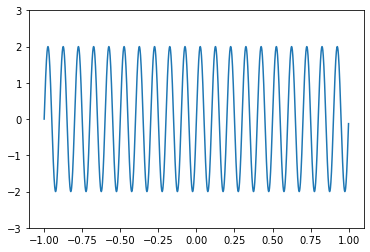

In [2]:
srate = 1000                    # sampling rate of 1 kHz
time = np.arange(-1, 1, 1/srate)
f = 10                          # frequency in Hz
amp = 2                         # amplitude of sine wave

sine_wave = amp * np.sin(2 * np.pi * f * time)

plt.plot(time, sine_wave)
plt.ylim(-3,3)

## Combining Sine Waves

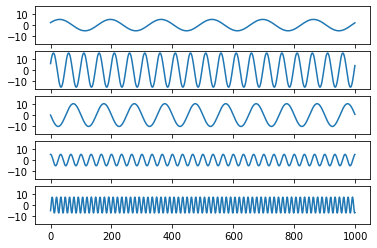

In [87]:
srate = 500                            # sampling rate
frex = np.array([3, 10, 5, 15, 35])    # list some frequencies
amplit = np.array([5, 15, 10, 5, 7])    # random amplitudes (must have same number of items as frex)
phases = np.array([np.pi/7, np.pi/8, np.pi, np.pi/2, -np.pi/4]) # random numbers in range -pi to pi
time = np.arange(-1, 1, 1/srate)

sine_waves = np.zeros((frex.shape[0], time.shape[0]))
for fi in range(frex.shape[0]):
    sine_waves[fi,:] = amplit[fi] * np.sin(2 * np.pi * frex[fi] * time + phases[fi])


fig, axes = plt.subplots(nrows=frex.shape[0], ncols=1, sharex=True, sharey=True)
for fi in range(frex.shape[0]):
    axes[fi].plot(sine_waves[fi,:])

plt.savefig('figures/sine_waves.png')

Text(0.5, 1.0, 'Sum of sine waves')

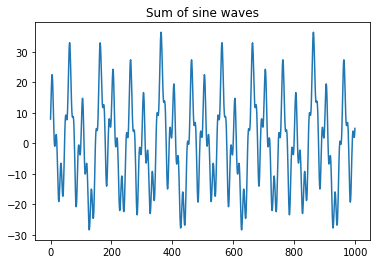

In [5]:
fig, ax = plt.subplots()
ax.plot(np.sum(sine_waves, axis=0))
ax.set_title('Sum of sine waves')

Text(0.5, 1.0, 'Sum of sine waves + white noise')

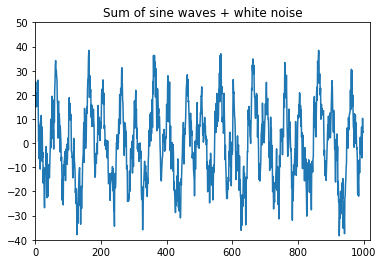

In [30]:
fig, ax = plt.subplots()
ax.plot(np.sum(sine_waves, axis=0) + (5 * np.random.randn(sine_waves.shape[1])))
ax.set_xlim(0, 1020)
ax.set_ylim(-40, 50)
ax.set_title('Sum of sine waves + white noise')

## Visualising Fourier Transform

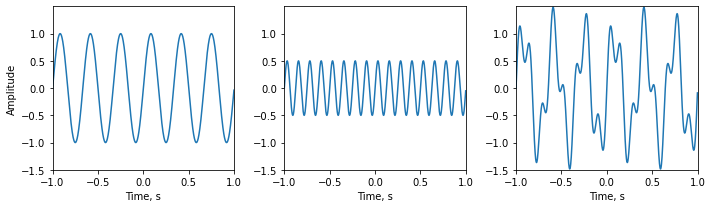

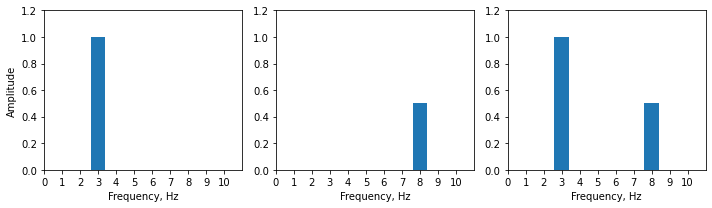

In [90]:
srate = 500
time = np.arange(-1, 1, 1/srate)

# create three sine waves
s1 = np.sin(2 * np.pi * 3 * time)
s2 = 0.5 * np.sin(2 * np.pi * 8 * time)
s3 = s1 + s2

# plot sine waves
fig, axes = plt.subplots(figsize=(10, 3), nrows=1, ncols=3)
for ax in axes:
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1.5, 1.5)
    ax.yaxis.set_ticks(np.arange(-1.5, 1.5, 0.5))
    ax.set_xlabel('Time, s')
axes[0].plot(time, s1)
axes[1].plot(time, s2)
axes[2].plot(time, s3)
axes[0].set_ylabel('Amplitude')

plt.tight_layout()
plt.savefig('figures/fourier_sines.png')

# plot power
fig, axes = plt.subplots(figsize=(10, 3), nrows=1, ncols=3)
for ax in axes:
    ax.set_xlim(0, 11)
    ax.set_ylim(0, 1.2)
    ax.xaxis.set_ticks(np.arange(0, 11))
    ax.set_xlabel('Frequency, Hz')
    
# perform Fast Fourier Transform on sine waves
f1 = fft(s1 / time.shape[0])
f2 = fft(s2 / time.shape[0])
f3 = fft(s3 / time.shape[0])

# the no. of unique frequencies is of length N/2 + 1
hz = np.linspace(0, srate/2, (np.floor(time.shape[0]/2)+1).astype(int))
axes[0].bar(hz, np.abs(f1[np.arange(0, hz.shape[0])] * 2))
axes[1].bar(hz, np.abs(f2[np.arange(0, hz.shape[0])] * 2))
axes[2].bar(hz, np.abs(f3[np.arange(0, hz.shape[0])] * 2))
axes[0].set_ylabel('Amplitude')

plt.tight_layout()
plt.savefig('figures/fourier_frex.png')

## Fourier Transform on Time-Series

The discrete Fourier transform of variable $x$ at frequency $f$ is:

\begin{equation}
X_{f}=\sum_{k=1}^{n} x_{k} e^{-i 2 \pi f(k-1) n^{-1}}
\end{equation}

where $n$ is the number of data points in $X$, $X_f$ is the Fourier coefficient of time series variable $x$ at frequency $f$.

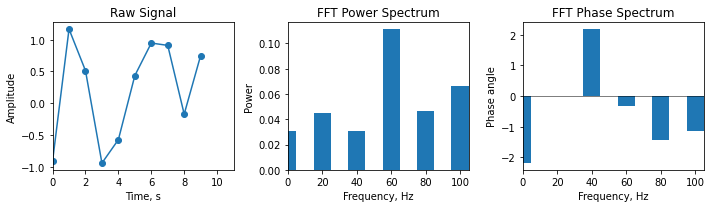

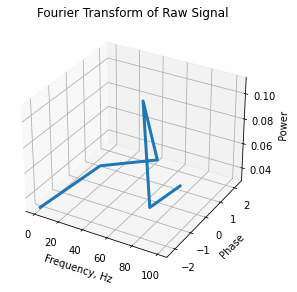

In [266]:
N = 10                       # length of sequence
data = np.random.randn(1, N) # random numbers
srate = 200                  # sampling rate in Hz
nyquist = srate/2            # Nyquist frequency - the highest frequency we can measure in the data

# initialise Fourier output matrix
fourier = np.zeros_like(data, dtype=complex)

# Actual frequencies in Hz that will be returned by the Fourier transform.
# The number of unique frequencies we can measure is exactly 1/2 of the
# number of data points in the time series + DC component.
frequencies = np.linspace(0, nyquist, int(N/2+1))
time = (np.arange(0, N)-1) / N

# Fourier transform is dot product between sine wave and data at each frequency
# see eqn above.
for k in range(N):
    # complex number i is represented as j
    sine_wave = np.exp(-1j * 2 * np.pi * (k-1) * time)
    fourier[:,k] = np.sum((sine_wave * data))
fourier = fourier / N

fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=3)

axes[0].plot(np.arange(0, 10, 1), data.T, '-o')
axes[0].set_xlim(0, N+1)
axes[0].set_xlabel('Time, s')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Raw Signal')

axes[1].bar(frequencies, (np.abs(fourier[:, 0:int(N/2+1)])**2).reshape(-1,), width=10)
axes[1].set_xlim(0, 105)
axes[1].xaxis.set_ticks(np.arange(0, 105, 20))
axes[1].set_xlabel('Frequency, Hz')
axes[1].set_ylabel('Power')
axes[1].set_title('FFT Power Spectrum')

axes[2].bar(frequencies, np.angle(fourier[:, 0:int(N/2+1)]).reshape(-1,), width=10)
axes[2].axhline(y=0, color='k', linestyle='-', linewidth=.5)
axes[2].set_xlim(0, 105)
axes[2].set_xlabel('Frequency, Hz')
axes[2].set_ylabel('Phase angle')
axes[2].xaxis.set_ticks(np.arange(0, 105, 20))
axes[2].set_title('FFT Phase Spectrum')

fig.tight_layout()
fig.savefig('figures/time_series_fourier_attrs.png')

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(frequencies, 
          np.angle(fourier[:, 0:int(N/2+1)]).reshape(-1,), 
          (np.abs(fourier[:, 0:int(N/2+1)])**2).reshape(-1,),
          linestyle='-',
          linewidth=3,
         )
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel('Phase')
ax.set_zlabel('Power')
ax.set_title('Fourier Transform of Raw Signal')

fig.tight_layout()
fig.savefig('figures/3d_fourier.png')